In [29]:
import os
import osmnx as ox
import geopandas as gpd
from shapely import wkt
import warnings
from shapely.geometry import MultiPolygon, Polygon, Point

import pandas as pd

from railroad import CustomJSONEncoder

import numpy as np
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [30]:
def get_building_geometries(csv_path, north, south, east, west, tags={"building": True}, crs="EPSG:4326", force_update=False):
    """
    Load building geometries from a CSV file if it exists, otherwise fetch from the web and save as CSV.

    Args:
        csv_path (str): Path to the CSV file.
        north, south, east, west (float): Bounding box coordinates.
        tags (dict): Tags to filter data from OSM. Default is {"building": True}.
        crs (str): Coordinate Reference System to assign. Default is "EPSG:4326".

    Returns:
        geopandas.GeoDataFrame: GeoDataFrame with building geometries.
    """
    if force_update or not os.path.exists(csv_path):
        # Fetch from OSM
        print("Fetching data from the web...")
        gdf = ox.geometries_from_bbox(north, south, east, west, tags=tags)
        gdf.to_csv(csv_path)
        print(f"Data saved to {csv_path}")
    else:
        # Load from CSV
        print(f"Loading data from {csv_path}")
        df = gpd.pd.read_csv(csv_path)
        df['geometry'] = df['geometry'].apply(wkt.loads)
        gdf = gpd.GeoDataFrame(df, geometry='geometry')
        gdf.set_crs(crs, inplace=True)

    return gdf

In [31]:
csv_file = "../data/buildings.csv"
north, south, east, west = 64.188968, 64.033992, -21.640345, -22.083955

gdf_buildings = get_building_geometries(
    csv_file, north, south, east, west, force_update=False)
display(gdf_buildings)

Loading data from ../data/buildings.csv


/tmp/ipykernel_29962/1913362445.py:23: DtypeWarning: Columns (5,6,7,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,53,54,55,56,57,59,60,62,64,65,66,67,68,71,73,75,76,79,80,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,111,112,113,114,120,121,122,128,129,130,136,137,138,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,226,228,229,230,231,234,235,236,237,238,239,240,241,242,244,245,246,247,248,249,250,251,252,253,254,255,256,257,259,260,261,262,263,264,265,266,267,268,271,272,273,274,275,276,277,278,279,280,281) have mixed types. Specify dtype option on import or set low_memory=False.
  df = gpd.pd.read_csv(csv_path

,element_type,osmid,amenity,name,geometry,tourism,description,wikimedia_commons,addr:city,addr:housenumber,...,parcel_pickup,refrigerated,fuel:adblue,fuel:coloured_diesel,fuel:methane,fuel:octane_98,ways,type,opening_hours:note,wikipedia:is
0,node,2710083164,NaN,NaN,POINT (-21.91402 64.14526),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,2975118984,NaN,NaN,POINT (-21.78329 64.13645),NaN,NaN,NaN,NaN,85b,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,3658949571,NaN,NaN,POINT (-21.88118 64.13811),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,11966388074,NaN,NaN,POINT (-21.95376 64.15519),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,11966388083,NaN,NaN,POINT (-21.94006 64.15847),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47174,relation,17577210,NaN,NaN,"POLYGON ((-21.90116 64.14565, -21.90108 64.145...",NaN,NaN,NaN,NaN,24,...,NaN,NaN,NaN,NaN,NaN,NaN,"[1163398762, 1281184589]",multipolygon,NaN,NaN
47175,relation,17860127,NaN,NaN,"MULTIPOLYGON (((-21.79414 64.15055, -21.79434 ...",NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,"[711490172, 711490173]",multipolygon,NaN,NaN
47176,relation,18180590,NaN,NaN,"MULTIPOLYGON (((-21.82900 64.12973, -21.82904 ...",NaN,NaN,NaN,Reykjavík,7,...,NaN,NaN,NaN,NaN,NaN,NaN,"[1271208837, 1271208838, 1271208836]",multipolygon,NaN,NaN
47177,relation,18180591,NaN,NaN,"MULTIPOLYGON (((-21.82823 64.12915, -21.82902 ...",NaN,NaN,NaN,Reykjavík,1,...,NaN,NaN,NaN,NaN,NaN,NaN,"[1326044776, 1326044777, 1326044778, 1326044779]",multipolygon,NaN,NaN


In [32]:
# Count unique geometry types
geometry_counts = gdf_buildings['geometry'].geom_type.value_counts()

# Display the results
print(geometry_counts)

Polygon         47161
Point               9
MultiPolygon        9
Name: count, dtype: int64


In [33]:
# Filter out Point geometries
filtered_gdf = gdf_buildings[gdf_buildings['geometry'].geom_type != 'Point']

# Convert Polygon to MultiPolygon
filtered_gdf['geometry'] = filtered_gdf['geometry'].apply(
    lambda geom: MultiPolygon([geom]) if geom.geom_type == 'Polygon' else geom
)

# Verify the transformation
print(filtered_gdf['geometry'].geom_type.value_counts())

MultiPolygon    47170
Name: count, dtype: int64


/home/ivan/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [34]:
filtered_gdf = filtered_gdf[['geometry']]

In [35]:
display(filtered_gdf)

,geometry
9,"MULTIPOLYGON (((-21.91400 64.14308, -21.91387 ..."
10,"MULTIPOLYGON (((-21.88009 64.10280, -21.87926 ..."
11,"MULTIPOLYGON (((-21.88060 64.10358, -21.87837 ..."
12,"MULTIPOLYGON (((-21.91381 64.14119, -21.91343 ..."
13,"MULTIPOLYGON (((-21.89905 64.11787, -21.89931 ..."
...,...
47174,"MULTIPOLYGON (((-21.90116 64.14565, -21.90108 ..."
47175,"MULTIPOLYGON (((-21.79414 64.15055, -21.79434 ..."
47176,"MULTIPOLYGON (((-21.82900 64.12973, -21.82904 ..."
47177,"MULTIPOLYGON (((-21.82823 64.12915, -21.82902 ..."


In [36]:
# Reproject to a metric CRS for accurate area calculation
filtered_gdf = filtered_gdf.to_crs(epsg=4326)

# Calculate area and add a new field
# Convert area to square meters
filtered_gdf['calculated_area'] = filtered_gdf['geometry'].to_crs(
    epsg=3857).area

# Inspect the updated GeoDataFrame
display(filtered_gdf)

,geometry,calculated_area
9,"MULTIPOLYGON (((-21.91400 64.14308, -21.91387 ...",3883.959942
10,"MULTIPOLYGON (((-21.88009 64.10280, -21.87926 ...",4752.141405
11,"MULTIPOLYGON (((-21.88060 64.10358, -21.87837 ...",56989.880228
12,"MULTIPOLYGON (((-21.91381 64.14119, -21.91343 ...",3505.833698
13,"MULTIPOLYGON (((-21.89905 64.11787, -21.89931 ...",2448.573105
...,...,...
47174,"MULTIPOLYGON (((-21.90116 64.14565, -21.90108 ...",9431.840269
47175,"MULTIPOLYGON (((-21.79414 64.15055, -21.79434 ...",3382.092624
47176,"MULTIPOLYGON (((-21.82900 64.12973, -21.82904 ...",9086.683094
47177,"MULTIPOLYGON (((-21.82823 64.12915, -21.82902 ...",15493.000624


<Axes: >

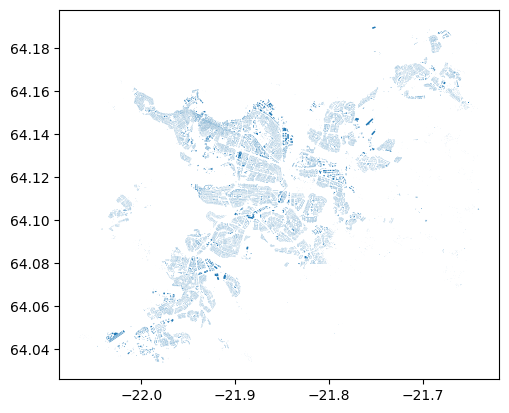

In [37]:
filtered_gdf.plot()

In [38]:
gpd_district_geom = gpd.read_file('../data/pop_district_geom_fixed.geojson')
gpd_district_geom['smsv_int'] = gpd_district_geom['smsv'].astype(int)
# Convert Medaltal to numeric, forcing errors to NaN
gpd_district_geom['Medaltal'] = pd.to_numeric(
    gpd_district_geom['Medaltal'], errors='coerce')

display(gpd_district_geom)

,smsv,smsv_label,smsv_label_en,Medaltal,geometry,smsv_int
0,0101,Reykjavík: Vesturbær norður - 0101,Reykjavik: Vesturbaer north - 0101,1379,"MULTIPOLYGON (((-21.95516 64.14637, -21.95490 ...",101
1,0102,Reykjavík: Vesturbær norður - 0102,Reykjavik: Vesturbaer north - 0102,1243,"MULTIPOLYGON (((-21.94822 64.14279, -21.94802 ...",102
2,0103,Reykjavík: Vesturbær norður - 0103,Reykjavik: Vesturbaer north - 0103,1267,"MULTIPOLYGON (((-21.94597 64.14783, -21.94475 ...",103
3,0104,Reykjavík: Vesturbær norður - 0104,Reykjavik: Vesturbaer north - 0104,1071,"MULTIPOLYGON (((-21.94609 64.15015, -21.94430 ...",104
4,3101,Suðurnes án Reykjanesbæjar - 3101,Southwest excl. Reykjanesbaer - 3101,2093,"MULTIPOLYGON (((-22.42807 63.94181, -22.42805 ...",3101
...,...,...,...,...,...,...
200,3402,Vestfirðir - 3402,Westfjords - 3402,1075,"MULTIPOLYGON (((-22.65863 66.09024, -22.65748 ...",3402
201,0705,Reykjavík: Háaleiti og Bústaðahverfi - 0705,Reykjavik: Haaleiti and Bustadahverfi - 0705,1892,"MULTIPOLYGON (((-21.87431 64.11726, -21.87431 ...",705
202,3303,Vesturland án Akraness - 3303,West excl. Akraness - 3303,1437,"MULTIPOLYGON (((-20.87857 64.70605, -20.87973 ...",3303
203,0603,Reykjavík: Laugardalur austur - 0603,Reykjavik: Laugardalur east - 0603,924,"MULTIPOLYGON (((-21.87529 64.14680, -21.87528 ...",603


In [39]:
num_nan_medaltal = gpd_district_geom['Medaltal'].isna().sum()
print(f"Number of NaN values in Medaltal: {num_nan_medaltal}")

Number of NaN values in Medaltal: 0


In [40]:
# Assign a representative point (centroid) for each building
filtered_gdf['centroid'] = filtered_gdf.geometry.centroid

# Create a new GeoDataFrame with centroids for the join
gdf_centroids = filtered_gdf.set_geometry('centroid')

# Perform the spatial join using centroids
gdf_with_districts = gpd.sjoin(
    gdf_centroids,
    gpd_district_geom[['smsv', 'geometry']],
    how='left',
    predicate='within'
)

# Restore the original geometry (multipolygon) and retain the district assignment
gdf_with_districts = gdf_with_districts.set_geometry('geometry')

/tmp/ipykernel_29962/3512612553.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_gdf['centroid'] = filtered_gdf.geometry.centroid


In [41]:
display(gdf_with_districts)

,geometry,calculated_area,centroid,index_right,smsv
9,"MULTIPOLYGON (((-21.91400 64.14308, -21.91387 ...",3883.959942,POINT (-21.91423 64.14321),24.0,0405
10,"MULTIPOLYGON (((-21.88009 64.10280, -21.87926 ...",4752.141405,POINT (-21.87977 64.10264),95.0,2105
11,"MULTIPOLYGON (((-21.88060 64.10358, -21.87837 ...",56989.880228,POINT (-21.87825 64.10362),95.0,2105
12,"MULTIPOLYGON (((-21.91381 64.14119, -21.91343 ...",3505.833698,POINT (-21.91370 64.14102),24.0,0405
13,"MULTIPOLYGON (((-21.89905 64.11787, -21.89931 ...",2448.573105,POINT (-21.89916 64.11770),20.0,0401
...,...,...,...,...,...
47174,"MULTIPOLYGON (((-21.90116 64.14565, -21.90108 ...",9431.840269,POINT (-21.90169 64.14541),17.0,0501
47175,"MULTIPOLYGON (((-21.79414 64.15055, -21.79434 ...",3382.092624,POINT (-21.79382 64.15051),47.0,1203
47176,"MULTIPOLYGON (((-21.82900 64.12973, -21.82904 ...",9086.683094,POINT (-21.82825 64.12967),190.0,1101
47177,"MULTIPOLYGON (((-21.82823 64.12915, -21.82902 ...",15493.000624,POINT (-21.82810 64.12892),190.0,1101


In [42]:
gdf_with_districts.rename(columns={'smsv_right': 'smsv'}, inplace=True)

In [43]:
# Keep only the relevant columns
gdf_with_districts = gdf_with_districts[[
    'smsv', 'calculated_area', 'geometry']]

In [44]:
print(gdf_with_districts.info())
print(list(gdf_with_districts.columns))

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 47170 entries, 9 to 47178
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   smsv             47160 non-null  object  
 1   calculated_area  47170 non-null  float64 
 2   geometry         47170 non-null  geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 1.4+ MB
None
['smsv', 'calculated_area', 'geometry']


In [45]:
display(gdf_with_districts)

,smsv,calculated_area,geometry
9,0405,3883.959942,"MULTIPOLYGON (((-21.91400 64.14308, -21.91387 ..."
10,2105,4752.141405,"MULTIPOLYGON (((-21.88009 64.10280, -21.87926 ..."
11,2105,56989.880228,"MULTIPOLYGON (((-21.88060 64.10358, -21.87837 ..."
12,0405,3505.833698,"MULTIPOLYGON (((-21.91381 64.14119, -21.91343 ..."
13,0401,2448.573105,"MULTIPOLYGON (((-21.89905 64.11787, -21.89931 ..."
...,...,...,...
47174,0501,9431.840269,"MULTIPOLYGON (((-21.90116 64.14565, -21.90108 ..."
47175,1203,3382.092624,"MULTIPOLYGON (((-21.79414 64.15055, -21.79434 ..."
47176,1101,9086.683094,"MULTIPOLYGON (((-21.82900 64.12973, -21.82904 ..."
47177,1101,15493.000624,"MULTIPOLYGON (((-21.82823 64.12915, -21.82902 ..."


In [46]:
# Group by 'smsv' and sum the 'calculated_area' for each district
district_area_df = gdf_with_districts.groupby('smsv', as_index=False)[
    'calculated_area'].sum()

district_area_df['smsv'] = district_area_df['smsv'].astype(str)

# Rename the column for clarity
district_area_df.rename(
    columns={'calculated_area': 'total_area'}, inplace=True)
display(district_area_df)

,smsv,total_area
0,0101,167376.877454
1,0102,156105.649568
2,0103,162414.721711
3,0104,735365.054750
4,0201,261390.403969
...,...,...
127,2403,537351.536680
128,2404,782832.854919
129,2405,273369.560803
130,2406,496621.071338


In [47]:
# Merge the district_area_df with gpd_district_geom on the 'smsv' column
gpd_district_geom = gpd_district_geom.merge(
    district_area_df,
    on='smsv',
    how='left'
)
gpd_district_geom['smsv'] = gpd_district_geom['smsv'].astype(str)

# Fill missing total_area values with np.nan (this is the default for missing data in pandas)
gpd_district_geom['total_area'] = gpd_district_geom['total_area'].fillna(
    np.nan)

display(gpd_district_geom)

,smsv,smsv_label,smsv_label_en,Medaltal,geometry,smsv_int,total_area
0,0101,Reykjavík: Vesturbær norður - 0101,Reykjavik: Vesturbaer north - 0101,1379,"MULTIPOLYGON (((-21.95516 64.14637, -21.95490 ...",101,167376.877454
1,0102,Reykjavík: Vesturbær norður - 0102,Reykjavik: Vesturbaer north - 0102,1243,"MULTIPOLYGON (((-21.94822 64.14279, -21.94802 ...",102,156105.649568
2,0103,Reykjavík: Vesturbær norður - 0103,Reykjavik: Vesturbaer north - 0103,1267,"MULTIPOLYGON (((-21.94597 64.14783, -21.94475 ...",103,162414.721711
3,0104,Reykjavík: Vesturbær norður - 0104,Reykjavik: Vesturbaer north - 0104,1071,"MULTIPOLYGON (((-21.94609 64.15015, -21.94430 ...",104,735365.054750
4,3101,Suðurnes án Reykjanesbæjar - 3101,Southwest excl. Reykjanesbaer - 3101,2093,"MULTIPOLYGON (((-22.42807 63.94181, -22.42805 ...",3101,NaN
...,...,...,...,...,...,...,...
200,3402,Vestfirðir - 3402,Westfjords - 3402,1075,"MULTIPOLYGON (((-22.65863 66.09024, -22.65748 ...",3402,NaN
201,0705,Reykjavík: Háaleiti og Bústaðahverfi - 0705,Reykjavik: Haaleiti and Bustadahverfi - 0705,1892,"MULTIPOLYGON (((-21.87431 64.11726, -21.87431 ...",705,471831.534324
202,3303,Vesturland án Akraness - 3303,West excl. Akraness - 3303,1437,"MULTIPOLYGON (((-20.87857 64.70605, -20.87973 ...",3303,NaN
203,0603,Reykjavík: Laugardalur austur - 0603,Reykjavik: Laugardalur east - 0603,924,"MULTIPOLYGON (((-21.87529 64.14680, -21.87528 ...",603,417767.613702


In [48]:
# Sum the Medaltal column
total_medaltal = gpd_district_geom['Medaltal'].sum()

print(f"Total Medaltal: {total_medaltal}")

Total Medaltal: 358301


In [49]:
# Ensure the GeoDataFrame is in EPSG:4326 (standard lat/lon)
gdf_with_districts = gdf_with_districts.to_crs(epsg=4326)

# Save to GeoJSON
gdf_with_districts.to_file(
    "../data/buildings_with_districts.geojson", driver="GeoJSON")

In [50]:
rooms_df = pd.read_csv('../data/smsv_sumrooms.csv', dtype={'smsv': str})
rooms_df['growth'] = (rooms_df['build'] +
                      rooms_df['notbuild']) / rooms_df['build']
display(rooms_df)

,smsv,build,notbuild,growth
0,0101,147,0,1.000000
1,0102,212,0,1.000000
2,0103,182,0,1.000000
3,0104,128,37,1.289062
4,0201,154,0,1.000000
...,...,...,...,...
127,2403,120,65,1.541667
128,2404,121,17,1.140496
129,2405,111,31,1.279279
130,2406,192,0,1.000000


In [51]:
# Ensure 'smsv' columns are of the same type
gpd_district_geom['smsv'] = gpd_district_geom['smsv'].astype(str)
district_area_df['smsv'] = district_area_df['smsv'].astype(str)

# Perform the merge
merged_df = gpd_district_geom.merge(
    district_area_df[['smsv', 'total_area']],
    on='smsv',
    how='left'
)

# Check for renamed columns and handle them
if 'total_area_y' in merged_df.columns:
    merged_df['total_area'] = merged_df['total_area_y']
elif 'total_area_x' in merged_df.columns:
    merged_df['total_area'] = merged_df['total_area_x']

# Ensure missing values are handled
merged_df['total_area'] = merged_df['total_area'].fillna(np.nan)

# Drop unnecessary columns if they exist
merged_df.drop(columns=['total_area_x', 'total_area_y'],
               inplace=True, errors='ignore')

# Assign the cleaned result back to gpd_district_geom
gpd_district_geom = merged_df

display(gpd_district_geom)

,smsv,smsv_label,smsv_label_en,Medaltal,geometry,smsv_int,total_area
0,0101,Reykjavík: Vesturbær norður - 0101,Reykjavik: Vesturbaer north - 0101,1379,"MULTIPOLYGON (((-21.95516 64.14637, -21.95490 ...",101,167376.877454
1,0102,Reykjavík: Vesturbær norður - 0102,Reykjavik: Vesturbaer north - 0102,1243,"MULTIPOLYGON (((-21.94822 64.14279, -21.94802 ...",102,156105.649568
2,0103,Reykjavík: Vesturbær norður - 0103,Reykjavik: Vesturbaer north - 0103,1267,"MULTIPOLYGON (((-21.94597 64.14783, -21.94475 ...",103,162414.721711
3,0104,Reykjavík: Vesturbær norður - 0104,Reykjavik: Vesturbaer north - 0104,1071,"MULTIPOLYGON (((-21.94609 64.15015, -21.94430 ...",104,735365.054750
4,3101,Suðurnes án Reykjanesbæjar - 3101,Southwest excl. Reykjanesbaer - 3101,2093,"MULTIPOLYGON (((-22.42807 63.94181, -22.42805 ...",3101,NaN
...,...,...,...,...,...,...,...
200,3402,Vestfirðir - 3402,Westfjords - 3402,1075,"MULTIPOLYGON (((-22.65863 66.09024, -22.65748 ...",3402,NaN
201,0705,Reykjavík: Háaleiti og Bústaðahverfi - 0705,Reykjavik: Haaleiti and Bustadahverfi - 0705,1892,"MULTIPOLYGON (((-21.87431 64.11726, -21.87431 ...",705,471831.534324
202,3303,Vesturland án Akraness - 3303,West excl. Akraness - 3303,1437,"MULTIPOLYGON (((-20.87857 64.70605, -20.87973 ...",3303,NaN
203,0603,Reykjavík: Laugardalur austur - 0603,Reykjavik: Laugardalur east - 0603,924,"MULTIPOLYGON (((-21.87529 64.14680, -21.87528 ...",603,417767.613702


In [52]:
gpd_district_geom['smsv'] = gpd_district_geom['smsv'].astype(str)
rooms_df['smsv'] = rooms_df['smsv'].astype(str)

# Merge the data
gpd_district_geom = gpd_district_geom.merge(
    rooms_df[['smsv', 'build', 'notbuild', 'growth']],
    on='smsv',
    how='left'
)

display(gpd_district_geom)

,smsv,smsv_label,smsv_label_en,Medaltal,geometry,smsv_int,total_area,build,notbuild,growth
0,0101,Reykjavík: Vesturbær norður - 0101,Reykjavik: Vesturbaer north - 0101,1379,"MULTIPOLYGON (((-21.95516 64.14637, -21.95490 ...",101,167376.877454,147.0,0.0,1.000000
1,0102,Reykjavík: Vesturbær norður - 0102,Reykjavik: Vesturbaer north - 0102,1243,"MULTIPOLYGON (((-21.94822 64.14279, -21.94802 ...",102,156105.649568,212.0,0.0,1.000000
2,0103,Reykjavík: Vesturbær norður - 0103,Reykjavik: Vesturbaer north - 0103,1267,"MULTIPOLYGON (((-21.94597 64.14783, -21.94475 ...",103,162414.721711,182.0,0.0,1.000000
3,0104,Reykjavík: Vesturbær norður - 0104,Reykjavik: Vesturbaer north - 0104,1071,"MULTIPOLYGON (((-21.94609 64.15015, -21.94430 ...",104,735365.054750,128.0,37.0,1.289062
4,3101,Suðurnes án Reykjanesbæjar - 3101,Southwest excl. Reykjanesbaer - 3101,2093,"MULTIPOLYGON (((-22.42807 63.94181, -22.42805 ...",3101,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
200,3402,Vestfirðir - 3402,Westfjords - 3402,1075,"MULTIPOLYGON (((-22.65863 66.09024, -22.65748 ...",3402,NaN,NaN,NaN,NaN
201,0705,Reykjavík: Háaleiti og Bústaðahverfi - 0705,Reykjavik: Haaleiti and Bustadahverfi - 0705,1892,"MULTIPOLYGON (((-21.87431 64.11726, -21.87431 ...",705,471831.534324,98.0,0.0,1.000000
202,3303,Vesturland án Akraness - 3303,West excl. Akraness - 3303,1437,"MULTIPOLYGON (((-20.87857 64.70605, -20.87973 ...",3303,NaN,NaN,NaN,NaN
203,0603,Reykjavík: Laugardalur austur - 0603,Reykjavik: Laugardalur east - 0603,924,"MULTIPOLYGON (((-21.87529 64.14680, -21.87528 ...",603,417767.613702,158.0,36.0,1.227848


In [53]:
gdf_with_districts.to_file(
    "../data/districts_with_buildings_area.geojson", driver="GeoJSON")

In [54]:
# Filter the rows where 'total_area' is not NaN
non_nan_total_area_smsv = gpd_district_geom[gpd_district_geom['total_area'].notna(
)]['smsv'].tolist()

print(non_nan_total_area_smsv)
print(len(non_nan_total_area_smsv))

['0101', '0102', '0103', '0104', '0201', '0202', '0203', '0204', '0205', '0206', '0301', '0302', '0501', '0303', '0304', '0401', '0402', '0403', '0404', '0405', '0502', '0503', '0504', '0601', '0602', '1402', '0604', '0606', '0701', '0702', '0703', '0704', '0706', '0707', '0708', '0801', '0802', '0803', '0804', '0805', '0806', '0807', '1203', '0901', '0902', '0903', '0904', '1705', '0905', '1003', '1004', '1005', '1006', '1103', '1104', '1201', '1706', '1204', '1205', '1206', '1301', '1801', '1302', '1303', '1403', '1404', '1501', '1502', '1503', '1504', '2004', '1601', '1602', '1603', '2005', '1701', '1702', '1703', '1704', '1802', '1807', '1808', '1811', '2006', '1901', '1904', '2003', '2103', '2104', '2105', '2106', '2201', '2202', '2205', '2301', '2302', '2303', '2401', '2402', '2403', '1809', '1806', '1202', '1804', '1903', '1902', '2007', '2001', '2002', '2102', '2101', '2203', '2204', '0207', '0208', '0605', '1002', '2406', '2407', '2404', '2405', '1001', '1102', '1305', '1101',

In [55]:
# Copying gdf_with_districts to avoid modifying the original
buildings_with_population = gdf_with_districts.copy()

# Merging population data and growth data from gpd_district_geom to buildings_with_population
buildings_with_population = buildings_with_population.merge(
    gpd_district_geom[['smsv', 'Medaltal', 'total_area', 'growth']],
    on='smsv',
    how='left'
)

# Calculating current population (2025)
buildings_with_population['population_2025'] = (
    buildings_with_population['calculated_area'] /
    buildings_with_population['total_area']
) * buildings_with_population['Medaltal']

# Calculating projected population for 2029 and 2030
buildings_with_population['population_2029'] = (
    buildings_with_population['population_2025'] *
    buildings_with_population['growth']
)
buildings_with_population['population_2030'] = (
    buildings_with_population['population_2029'] *
    buildings_with_population['growth']
)

display(buildings_with_population)

,smsv,calculated_area,geometry,Medaltal,total_area,growth,population_2025,population_2029,population_2030
0,0405,3883.959942,"MULTIPOLYGON (((-21.91400 64.14308, -21.91387 ...",2619.0,3.717841e+05,1.000000,27.360212,27.360212,27.360212
1,2105,4752.141405,"MULTIPOLYGON (((-21.88009 64.10280, -21.87926 ...",1154.0,3.757481e+05,1.338843,14.594807,19.540155,26.161199
2,2105,56989.880228,"MULTIPOLYGON (((-21.88060 64.10358, -21.87837 ...",1154.0,3.757481e+05,1.338843,175.027683,234.334584,313.737211
3,0405,3505.833698,"MULTIPOLYGON (((-21.91381 64.14119, -21.91343 ...",2619.0,3.717841e+05,1.000000,24.696535,24.696535,24.696535
4,0401,2448.573105,"MULTIPOLYGON (((-21.89905 64.11787, -21.89931 ...",2258.0,4.778074e+05,1.000000,11.571352,11.571352,11.571352
...,...,...,...,...,...,...,...,...,...
47165,0501,9431.840269,"MULTIPOLYGON (((-21.90116 64.14565, -21.90108 ...",2628.0,5.635955e+05,1.202532,43.979903,52.887225,63.598561
47166,1203,3382.092624,"MULTIPOLYGON (((-21.79414 64.15055, -21.79434 ...",1693.0,2.793860e+05,1.012821,20.494525,20.757275,21.023394
47167,1101,9086.683094,"MULTIPOLYGON (((-21.82900 64.12973, -21.82904 ...",1467.0,1.103674e+06,1.000000,12.077992,12.077992,12.077992
47168,1101,15493.000624,"MULTIPOLYGON (((-21.82823 64.12915, -21.82902 ...",1467.0,1.103674e+06,1.000000,20.593251,20.593251,20.593251


In [56]:
buildings_with_population.to_file(
    "../data/buildings_with_population.geojson", driver="GeoJSON")